# Ampliación de Matemáticas. Curso 2021-22.
## Máster INO, ETSI Navales, UPM

## Examen. Convocatoria extraordinaria.

## Nombre, apellidos y DNI: 

Los primeros apartados tratan sobre la resolución del siguiente problema de valor inicial:

$$
\begin{array}[ll]
 \dfrac{}{}\dfrac{d\theta(t)}{dt} = & \dfrac{1}{ml^2}\xi (t)\\
  \dfrac{d\phi(t)}{dt} = & \dfrac{1}{ml^2\sin^2(\theta(t))}\eta (t) \\
  \dfrac{d\xi(t)}{dt} = & \dfrac{\cos(\theta(t))}{ml^2\sin^3(\theta(t))}\eta (t)^2 - mgl\sin(\theta(t))\\
  \dfrac{d\eta(t)}{dt} = & 0,
\end{array}
$$
con

$$ \theta(0) = \theta_0,\quad \phi(0) = \phi_0,\quad \xi(0) = \xi_0,\quad \eta(0) = \eta_0.$$

Físicamente, estas ecuaciones describen el movimiento, expresado en coordenadas esféricas, de una masa $m$ unida, mediante una vara rígida de longitud $l$, a un punto fijo de masa despreciable. Las únicas fuerzas externas que actuan sobre esta masa son las debidas a la gravedad $g$.

Haremos las siguientes elecciones de $m$, $l$ y $g$:
 
 $$ m = 1,\quad l = 2,\quad g = 10 $$

## Apartado 1 (2,5p.)

 - (1p.) Resuelve el problema de valor inicial utilizando ``solve_ivp`` para $0\leq t \leq 5$ 
y datos iniciales
 
 $$ \theta_0 = \phi_0 = \xi_0 = \eta_0 = 1. $$
 
 - (1,5p.) Produce una figura que represente los valores de la función $\theta(t)$ en los puntos utilizados por el método adaptativo junto con la gráfica resultante de interpolar los valores de $\theta(t)$ usando una spline cúbica en dichos puntos. 

In [1]:
#Librerías que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integ
import scipy.interpolate as interp
from scipy.optimize import root

In [2]:
y0 = [1,1,1,1]
t0, tf = 0, 5
m = 1
l = 2
g = 10

def fun(t, ys):
    theta, phi, xi, eta = ys
    return np.array([xi/(m*l**2), 
                     eta/(m*(l**2)*np.sin(theta)**2),
                     (np.cos(theta)/(m*(l**2)*np.sin(theta)**3))*(eta**2) - m*l*g*np.sin(theta),
                     0])

Text(0.5, 1.0, 'solve_ivp')

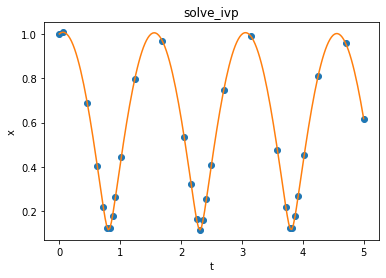

In [3]:
t_span = [t0, tf]
sol = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45')

t_eval = np.linspace(t0, tf, 200)
sol_densa = integ.solve_ivp(
    fun, t_span, y0, 
    method='RK45',
    t_eval=t_eval
)

plt.plot(sol['t'], sol['y'][0,:], 'o')
plt.plot(sol_densa['t'], sol_densa['y'][0,:], '-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('solve_ivp')

## Apartado 2 (1,5p.)

- (1p.) Produce figuras que representen para condiciones iniciales $\theta(0)=r, \phi(0)=r, \xi(0) = r, \eta(0) = r$ donde $r$ se obtiene tomando $20$ puntos equiespaciados entre $-2$ y $2$, las curvas $(\theta(t),\xi(t))$ con $t$ en el intervalo $[0,5]$.
- (1p.) Para las mismas condiciones iniciales del apartado anterior, representa gráficamente las curvas que se obtienen proyectando la expresión en coordenadas cartesianas de las trayectorias del sistema:
$$
 x=l\sin \theta \cos \phi \\
y=l\sin \theta \sin \phi 
$$
en el intervalo temporal $[0,20]$.

Text(0.5, 1.0, 'Diagrama de fases')

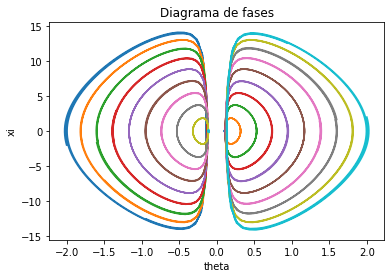

In [4]:
rs = np.linspace(-2, 2, 20)
t_eval = np.linspace(t0, tf, 200)
for r in rs:
    y0 = [r, r, r, r]
    sol_densa = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=t_eval
    )

    plt.plot(sol_densa['y'][0,:], sol_densa['y'][2,:], '-')
plt.xlabel('theta')
plt.ylabel('xi')
plt.title('Diagrama de fases')

Text(0.5, 1.0, 'Diagrama de fases')

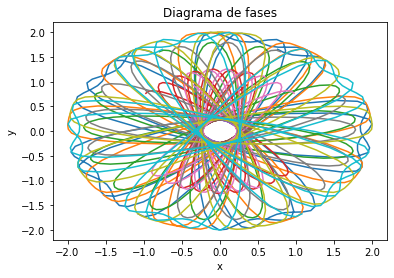

In [6]:
tf = 20
t_span = [t0, tf]
rs = np.linspace(-2, 2, 10)
t_eval = np.linspace(t0, tf, 200)
for r in rs:
    y0 = [r, r, r, r]
    sol_densa = integ.solve_ivp(
        fun, t_span, y0, 
        method='RK45',
        t_eval=t_eval
    )
    x_eval = l*np.sin( sol_densa['y'][0,:] )*np.cos( sol_densa['y'][1,:] )
    y_eval = l*np.sin( sol_densa['y'][0,:] )*np.sin( sol_densa['y'][1,:] )
    plt.plot(x_eval, y_eval, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de fases')

## Apartado 3 (1,5p.)

El momento angular de la partícula respecto al eje $z$ es:

$$ L_{z}=ml^{2}\sin ^{2}\theta \,\frac{d\phi} {dt}. $$

Aproxima el momento angular medio:

$$\frac{1}{5}\int_0^5 L_z(t)dt$$

para los datos iniciales 

$$ \theta_0 = \pi/2,\; \phi_0 = \xi_0 = \eta_0 = 1.  $$

## Apartado 4 (2p.)

Consideramos la función

$$ f(x) = \sin\left(\frac{1}{x}\right). $$

- Representa la gráfica de $f$ para $x$ entre cero y uno.
- A la vista de la gráfica y de las propiedeades la función seno, ¿cuántas raíces posee $f$ en el intervalo $[0,1]$?
- De los métodos para aproximar raíces de ecuaciones no lineales vistos durante el curso, ¿hay alguno que permita, al menos en teoría, calcular todas las raíces de $f$?
- ¿Es posible, utilizando los resultados vistos durante el curso, estimar el error cometido al aproximar la integral

$$ \int_0^1f(x)dx $$

mediante la reglar de Simpson compuesta?

Razona las respuestas a todos los apartados.